In [3]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from openai.embeddings_utils import cosine_similarity
from openai.embeddings_utils import get_embedding

In [4]:
df = pd.read_csv("EPiC Database 2019.csv", names = ['Category', 'Material', 'Functional unit', 'Embodied Energy (MJ)', 'Embodied Water (L)', 'Embodied Greenhouse Gas Emissions (kgCO₂e)', 'More information'], skiprows= 1)
df.head(10) 


,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information
0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc
1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc
2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc
3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc
4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432
5,Concrete and plaster products,Portland cement,kg,11.8,7.8,1.3,http://doi.org/10.26188/5da55701cee5d
6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7
7,Concrete and plaster products,AAC block - 600 × 200 × 100 mm,no.,56.4,55.4,4.7,http://doi.org/10.26188/5da551fc254d7
8,Concrete and plaster products,AAC block - 600 × 200 × 150 mm,no.,84.5,83,7,http://doi.org/10.26188/5da551fc254d7
9,Concrete and plaster products,AAC block - 600 × 200 × 200 mm,no.,113,111,9.4,http://doi.org/10.26188/5da551fc254d7


In [5]:
# from openai.embeddings_utils import get_embedding

# test_df['embeddings'] = test_df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# test_df.to_csv('word_embeddings.csv')

In [6]:
df_em = pd.read_csv('word_embeddings.csv')
df_em['embeddings'] = df_em['embeddings'].apply(eval).apply(np.array)
df_em

,Unnamed: 0,Material,embeddings
0,0,0. Plasterboard-Standard-Paint-White-Matte,"[0.003881110344082117, 0.0034373656380921602, ..."
1,1,1. Masonry-Block-190x390-Running-Natural,"[-0.0011347883846610785, 0.0077765635214746, -..."
2,2,2. EDEN_Wet-Areas-Wall-Tile-600-x-600,"[0.009853625670075417, 0.010180942714214325, -..."
3,3,3. ---Plasterboard---Plasterboard,"[-0.004548346158117056, 0.004125015344470739, ..."
4,4,4. Wood-Pine-Stud,"[-0.0007378872251138091, 0.008706395514309406,..."
5,5,5. ATO_Timber-Shiplap_45UP,"[-0.028975583612918854, 0.015434159897267818, ..."
6,6,6. Metal-Steel-Furring-Zincalume,"[-0.003701475216075778, 0.012387648224830627, ..."
7,7,7. ACU_PLY01_PLYWOOD,"[-0.002357288496568799, 0.0019214723724871874,..."
8,8,8. ATO_Timber-Shiplap_45DOWN,"[-0.03163563087582588, 0.010707972571253777, -..."
9,9,9. ---PLYWOOD,"[0.004955127369612455, -0.009813971817493439, ..."


In [7]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
pddf = pd.read_csv('word_embeddings.csv')

# Convert to a list of lists of floats
matrix = np.array(pddf.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(53, 2)

In [8]:
# import matplotlib.pyplot as plt
# import matplotlib
# import numpy as np

# colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
# x = [x for x,y in vis_dims]
# y = [y for x,y in vis_dims]
# color_indices = pddf.Material.values - 1

# colormap = matplotlib.colors.ListedColormap(colors)
# plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
# for score in [0,1,2,3,4]:
#     avg_x = np.array(x)[pddf.Material-1==score].mean()
#     avg_y = np.array(y)[pddf.Material-1==score].mean()
#     color = colors[score]
#     plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

# plt.title("Amazon ratings visualized in language using t-SNE")

In [9]:
search_term = input('Enter a search term: ')

In [10]:
search_term_vector = get_embedding(search_term, engine='text-embedding-ada-002')
search_term_vector

[-0.007446334231644869,
 -0.021665772423148155,
 -0.0046480088494718075,
 -0.032641466706991196,
 -0.01407663244754076,
 -0.008065162226557732,
 -0.003197843674570322,
 -0.029050905257463455,
 -0.005079828202724457,
 -0.02094493992626667,
 0.005732657387852669,
 0.03707526624202728,
 0.005702055990695953,
 -0.0029768336098641157,
 -0.01882324554026127,
 -0.00864998809993267,
 0.035960014909505844,
 0.0018785843858495355,
 0.02335224859416485,
 -0.024113882333040237,
 -0.00437599653378129,
 0.007793149910867214,
 -0.0096632344648242,
 -0.011682924814522266,
 -0.0018547832733020186,
 0.008697590790688992,
 0.01519188191741705,
 0.003556559793651104,
 -0.0019635881762951612,
 -0.023488255217671394,
 0.02853408083319664,
 -0.03612322360277176,
 -0.021584169939160347,
 -0.035171180963516235,
 -0.011628522537648678,
 -0.021638572216033936,
 0.005086628254503012,
 -0.01137011032551527,
 0.01153331808745861,
 -0.0016422737389802933,
 0.023923475295305252,
 0.02309383638203144,
 0.0081671671941

In [11]:
from openai.embeddings_utils import cosine_similarity
df_em['similarities'] = df_em['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector))
df_em.sort_values("similarities", ascending=False).head(20)

,Unnamed: 0,Material,embeddings,similarities
25,25,25. ---CARPET---Carpet,"[0.015839625149965286, -3.118808308499865e-05,...",0.807738
10,10,10. ---TIMBER---Timber,"[-0.00831592082977295, -0.028976716101169586, ...",0.761834
37,37,37. MAT,"[0.00022071940475143492, 0.01290005911141634, ...",0.760512
17,17,17. ---PLYWOOD---Plywood,"[0.002984515856951475, 0.006218712776899338, 0...",0.759239
40,40,40. roof-walkway,"[0.004040846601128578, -0.006958275567740202, ...",0.759197
21,21,21. ---CONCRETE----Concrete,"[-0.002465516561642289, 0.01187960896641016, 0...",0.758883
29,29,29. Timber,"[-0.009792777709662914, -0.019705304875969887,...",0.756650
9,9,9. ---PLYWOOD,"[0.004955127369612455, -0.009813971817493439, ...",0.756460
38,38,38. MAT-2,"[-0.006570138037204742, 0.008930218406021595, ...",0.756156
22,22,22. Terrazzo-tiles,"[-0.00482450146228075, 0.007756778504699469, 0...",0.755490


In [12]:
# from openai.embeddings_utils import get_embedding

# df['embeddings'] = df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# df.to_csv('word_embeddings_EPiC.csv')

In [13]:
df_epic = pd.read_csv('word_embeddings_EPiC.csv')
df_epic['embeddings'] = df_epic['embeddings'].apply(eval).apply(np.array)
df_epic

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,"[-0.02005346491932869, -0.0024382583796977997,..."
1,1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.005028039216995239, 0.006394283380359411, ..."
2,2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc,"[-0.00465925969183445, 0.008461344987154007, -..."
3,3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.0043403590098023415, 0.008137354627251625,..."
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,"[-0.012803852558135986, 0.014618215151131153, ..."
...,...,...,...,...,...,...,...,...,...
279,279,Timber products,Structural insulated panel (SIP),m²,2 624,4 219,135,http://doi.org/10.26188/5da5586fec593,"[-0.009794671088457108, 0.009694453328847885, ..."
280,280,Timber products,SIP - 142 mm,m²,3 327,5 349,171,http://doi.org/10.26188/5da5586fec593,"[0.00539021659642458, 0.01879829913377762, -0...."
281,281,Timber products,SIP - 162 mm,m²,3 795,6 103,195,http://doi.org/10.26188/5da5586fec593,"[0.0035224827006459236, 0.023833518847823143, ..."
282,282,Timber products,Softwood,m³,9 392,13 091,549,http://doi.org/10.26188/5da5578416cc9,"[0.003608147846534848, -0.011392055079340935, ..."


In [46]:
search_term_epic = input('Enter a search term: ')

In [47]:
search_term_epic = input('Enter a search term: ')
search_term_vector_epic = get_embedding(search_term_epic, engine='text-embedding-ada-002')
df_epic['similarities'] = df_epic['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector_epic))
df_epic.sort_values("similarities", ascending=False).head(10)

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings,similarities
6,6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7,"[-0.0046515814028680325, 0.0014236009446904063...",0.849386
10,10,Concrete and plaster products,Concrete 20 MPa,m³,2 404,4 154,328,http://doi.org/10.26188/5da54a205d0e5,"[0.0015791815239936113, 0.005774808581918478, ...",0.842941
22,22,Concrete and plaster products,Concrete 50 MPa,m³,3 998,4 365,600,http://doi.org/10.26188/5da5514c0eea5,"[0.0003159770858474076, 0.0004473714216146618,...",0.840145
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,"[-0.02005346491932869, -0.0024382583796977997,...",0.838369
16,16,Concrete and plaster products,Concrete 32 MPa,m³,3 015,4 300,416,http://doi.org/10.26188/5da550538b369,"[0.013591989874839783, 0.007851066067814827, -...",0.838151
19,19,Concrete and plaster products,Concrete 40 MPa,m³,3 476,4 355,497,http://doi.org/10.26188/5da5507e33fe6,"[0.001810640562325716, 0.0036380928941071033, ...",0.837234
13,13,Concrete and plaster products,Concrete 25 MPa,m³,2 581,4 196,361,http://doi.org/10.26188/5da54a4ae57a1,"[-0.008547145873308182, 0.0053861006163060665,...",0.836739
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,"[-0.012803852558135986, 0.014618215151131153, ...",0.832341
12,12,Concrete and plaster products,Concrete 20 MPa - 30% GGBFS,m³,2 186,4 034,263,http://doi.org/10.26188/5da54a205d0e5,"[0.008664371445775032, 0.014413876459002495, -...",0.831452
15,15,Concrete and plaster products,Concrete 25 MPa - 30% GGBFS,m³,2 441,4 105,293,http://doi.org/10.26188/5da54a4ae57a1,"[0.00041449032141827047, 0.01288472767919302, ...",0.830873


In [48]:
highest_similarity = df_epic['similarities'].max()

In [49]:
if highest_similarity >= 0.9:
    fact_with_highest_similarity = df_epic.loc[df_epic['similarities'] == highest_similarity, 'Material']
    print(fact_with_highest_similarity)
else:
    response = openai.Completion.create(
      model = 'text-davinci-003',
      prompt = search_term_epic,
      max_tokens = 30,
      temperature = 0
    )
    content = response['choices'][0]['text'].replace('\n', '')
    print(content)


Standardized concrete is a type of concrete that is produced in a consistent manner, using the same materials and methods, regardless of the location or


In [16]:
def search_materials(df_epic, material_description, n=5, pprint=True):
    material_embedding = get_embedding(
        material_description,
        engine="text-embedding-ada-002"
    )
    df_epic["similarities"] = df_epic.embeddings.apply(lambda x: cosine_similarity(x, material_embedding))

    results = (
        df_epic.sort_values("similarities", ascending=False)
        .head(n)
        .loc[:, "Material"] #<--- how to get two columns and return everything
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results

In [17]:
results = search_materials(df_epic, "Concrete (Cox)", n=3)

Concrete 40 MPa

Concrete 20 MPa

Concrete 25 MPa



In [18]:
results = search_materials(df_epic, "Timber Lining (Cox)", n=5)

Cross laminated timber (CLT)

Glued laminated timber (glulam)

Fibre cement weatherboard

Softwood

Hardwood



In [19]:
results = search_materials(df_epic, "Concrete - Cast In Situ", n=5)

Concrete 32 MPa

Concrete 40 MPa

Concrete 25 MPa

Concrete block

Concrete 25 MPa - 30% fly ash



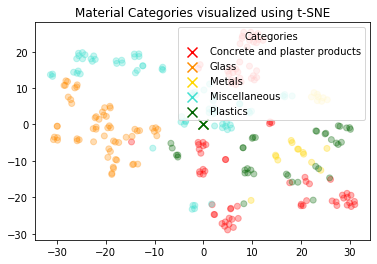

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the embeddings
df_epic_em = pd.read_csv('word_embeddings_EPiC.csv')

# Convert to a list of lists of floats
matrix = np.array(df_epic_em.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Define the categories and their respective colors
categories = df_epic_em['Category'].unique()
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

# Extract the x and y coordinates from the t-SNE result
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]

# Get the color indices for each point
color_indices = df_epic_em.Category.astype('category').cat.codes

# Create a colormap based on the categories and colors
colormap = mcolors.ListedColormap(colors)

# Scatter plot with category colors
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# Plot markers for each category
for score, color in enumerate(colors):
    avg_x = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[0]).mean()
    avg_y = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[1]).mean()
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100, label=categories[score])

# Add legend
plt.legend(title='Categories', loc='upper right')

plt.title("Material Categories visualized using t-SNE")
plt.show()